In [1]:
# !pip install pandas matplotlib
# !ls -la /home/jovyan/.var

In [2]:
import os
import datetime as dt

import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
def read_matic_k_lines() -> pd.DataFrame:
    columns = [
        'open_time', 'open', 'high', 'low', 'close',
        'volume', 'close_time', 'quote_volume',
        'count', 'taker_buy_volume',
        'taker_buy_quote_volume', 'ignore',
    ]
    dfs = [
        pd.read_csv('/home/jovyan/.var/' + p, header=None)
        for p in os.listdir('/home/jovyan/.var')
        if 'MATICUSDT-1m' in p
    ]
    matic_df = pd.concat(dfs)
    matic_df.columns = columns
    return matic_df

matic_df = read_matic_k_lines()

In [3]:
start_time = dt.datetime.strptime('2023-08-01', '%Y-%m-%d')
end_time = dt.datetime.strptime('2023-12-01', '%Y-%m-%d')
matic_df_08_12 = matic_df \
    .assign(_open_time=lambda x: (x.open_time / 1000).apply(dt.datetime.utcfromtimestamp)) \
    [lambda x: (x._open_time >= start_time) & (x._open_time <= end_time)]

In [4]:
def draw_candles() -> None:
    matic_df_08_12_ = matic_df_08_12.set_index('_open_time').sort_values(by=['open_time'])
    plt.figure()
    up = matic_df_08_12_[matic_df_08_12_.close >= matic_df_08_12_.open] 
    down = matic_df_08_12_[matic_df_08_12_.close < matic_df_08_12_.open] 
    col1 = 'blue'
    col2 = 'green'
    width = .3
    width2 = .03
    plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1) 
    plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1) 
    plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1) 
    plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2) 
    plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2) 
    plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2) 
    plt.xticks(rotation=30, ha='right') 
    plt.show() 
# draw_candles()

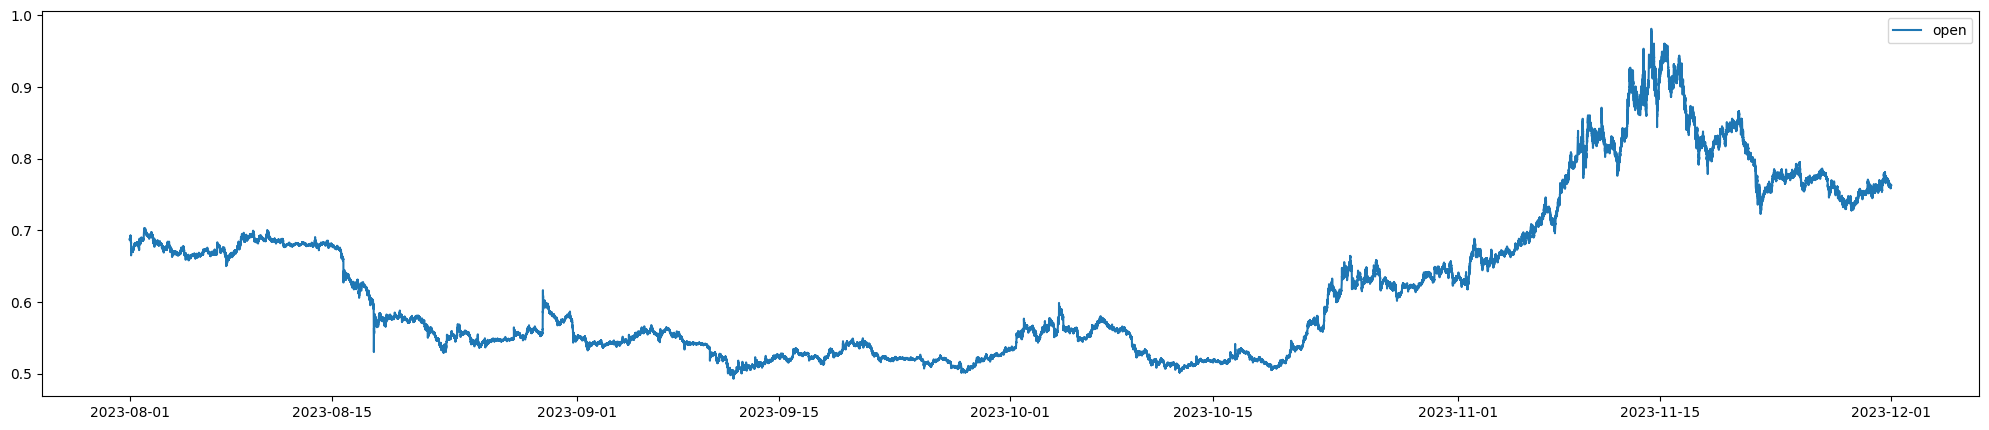

In [7]:
def gen_plot_img() -> None:
    matic_df_ = matic_df_08_12.sort_values(by=['open_time'])
    plt.figure(figsize=(25,5))
    plt.plot(matic_df_._open_time, matic_df_.open, label='open')
    plt.legend()
    plt.show()
gen_plot_img()

In [ ]:
def 